Marisa Alonso González-Noriega marisa.alonso@cunef.edu
<br>
Ignacio Sigüenza Sierra ignacio.siguenza@cunef.edu

# MODELADO DE LOS DATOS

In [2]:
import os
os.getcwd()
os.chdir('X:/Academico/CUNEF/Curso/machine_learning/00.PRACTICA_FINAL/notebooks')

In [1]:
import sys
sys.path

['x:\\Academico\\CUNEF\\Curso\\machine_learning\\00.PRACTICA_FINAL\\notebooks',
 'c:\\Users\\Usuario\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles',
 'c:\\Users\\Usuario\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles\\lib\\python',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Usuario\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Usuario\\.ipython']

Añadimos la ruta a la carpeta src para que detecte el modulo con funciones propias que hemos creado

In [3]:
sys.path = [
 'x:\\Academico\\CUNEF\\Curso\\machine_learning\\00.PRACTICA_FINAL\\notebooks\\src', # Ruta adicional
 'x:\\Academico\\CUNEF\\Curso\\machine_learning\\00.PRACTICA_FINAL\\notebooks',
 'c:\\Users\\Usuario\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles',
 'c:\\Users\\Usuario\\.vscode\\extensions\\ms-toolsai.jupyter-2021.11.1001550889\\pythonFiles\\lib\\python',
 'C:\\ProgramData\\Anaconda3\\python38.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Usuario\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Usuario\\.ipython'
 ]

In [34]:
import Funciones as f
# ---------------------------------
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import category_encoders as ce
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, roc_auc_score, precision_score, confusion_matrix, f1_score, mean_absolute_percentage_error, mean_absolute_error, precision_recall_curve, auc, roc_curve, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn.inspection import PartialDependenceDisplay
import scikitplot as skplt
import pickle
import time
import warnings


In [3]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Importamos los datos que habiamos obtenido tras realizar el análisis descriptivo

In [4]:
df= pd.read_csv("../data/pd_data_initial_preprocessing.csv", index_col=[0])

In [34]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_ANTIG
0,1999,1.0,1.0,20.0,False,2.0,34,UU,1,5,3,03,06,M,41,11,UU,1,24
1,1999,1.0,1.0,20.0,False,2.0,34,UU,1,5,3,03,01,M,19,11,UU,1,27
2,1999,1.0,1.0,20.0,False,2.0,34,UU,1,5,3,03,01,F,20,13,02,2,27
3,1999,1.0,1.0,8.0,False,1.0,01,UU,5,3,6,18,01,M,46,11,UU,1,28
4,1999,1.0,1.0,8.0,False,1.0,01,UU,5,3,6,18,NN,M,05,99,UU,3,NNNN


Separamos nuestros datos en train y test, como nuestro dataset está muy desbalanceado realizamos un undersampling, es decir separamos los datos estratificándolos en función de la variable target.

De esta manera como se observa a continuación mantenemos los porcentajes de true y false en ambas particiones del dataset.

In [5]:
x_trainst, x_testst, y_trainst, y_testst = train_test_split(df.drop('C_SEV',axis=1), 
                                                                     df['C_SEV'], 
                                                                     stratify=df['C_SEV'], 
                                                                     test_size=0.25,
                                                            random_state = 12345)
df_train_strat = pd.concat([x_trainst, y_trainst],axis=1)
df_test_strat = pd.concat([x_testst, y_testst],axis=1)

In [7]:
print('--> Train\n', df_train_strat['C_SEV'].value_counts(normalize=True))
print('--> Test\n', df_test_strat['C_SEV'].value_counts(normalize=True))

--> Train
 False    0.983252
True     0.016748
Name: C_SEV, dtype: float64
--> Test
 False    0.983253
True     0.016747
Name: C_SEV, dtype: float64


In [6]:
categoricas= f.dame_variables_categoricas2(df)[0]
numericas= list(df.select_dtypes(include=['int32', 'int64', 'float64','int','float']).columns)
numericas


['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR']

Para realizar la mayoria de los modelos, necesitamos codificar las variables, vamos a realizar tres tipos de encoding distintos en función de la cantidad de valores únicos que tengamos en cada columna.

Comenzamos realizando un one hot encoding para aquellas variables categóricas que toman menos de 10 valores distintos.
Tomamos unicamente estas variables para este tipo de encoding porque sino creariamos demasiadas columnas nuevas

In [8]:
One_hot=[]
for var in categoricas:
    if len(df[var].unique())<=10:
        One_hot.append(var)
One_hot

['C_WTHR', 'C_RALN', 'P_SEX', 'P_SAFE', 'P_USER']

Para las variables muy grandes, con mas de 50 valores únicos, decidimos realizar un cat_boost encoding

In [9]:
Cat_boost=[]
for var in categoricas:
    if len(df[var].unique())>=50:
        Cat_boost.append(var)
Cat_boost

['C_VEHS', 'P_AGE', 'V_ANTIG']

Y para el resto de variables categóricas realizamos un target encoding

In [10]:
Resto_cat=list(set(categoricas)-set(Cat_boost)-set(One_hot))
Resto_cat

['P_PSN', 'C_CONF', 'C_TRAF', 'V_TYPE', 'C_RCFG', 'C_RSUR']

Creamos un column transformer con los diferentes tipos de encoding que hemos escogido y las variables que hemos seleccionado para cada tipo de encoding 

In [11]:
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numericas),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), One_hot),
                    ('catboost', ce.CatBoostEncoder(), Cat_boost),
                    ('target', ce.TargetEncoder(), Resto_cat),
                    ],
                   remainder='passthrough')


En lo que respecta a las métricas, vamos a tomar como referencia el área bajo la curva ROC, la precisión y la sensitividad para comparar el rendimiento entre modelos. Nótese que prescindiremos del accuracy al tratarse de un conjunto de datos en el que existe un fuerte desbalanceo entre categorías a predecir, por lo que la información que distorsiona el rendimiento real del modelo a la hora de evaluarlo. Esto se debe a que el modelo tenderá a predecir que todos los registros futuros se encuentran dentro de la clase mayoritaria.

---------
 DecisionTreeClassifier(class_weight='balanced') 206.39 seconds of execution
Recall: 0.122 
Precision: 0.129 
ROC AUC: 0.554 
F1 score: 0.126 
Precision-Sensibilidad AUC: 0.133 
Accuracy: 0.972


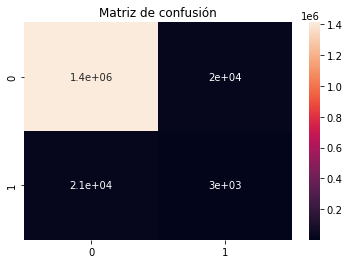

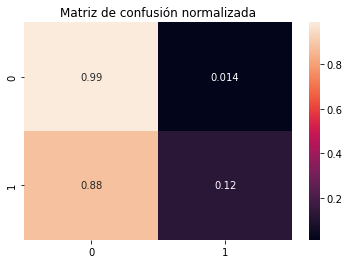

---------
 RandomForestClassifier(class_weight='balanced') 1774.11 seconds of execution
Recall: 0.155 
Precision: 0.490 
ROC AUC: 0.843 
F1 score: 0.235 
Precision-Sensibilidad AUC: 0.240 
Accuracy: 0.983


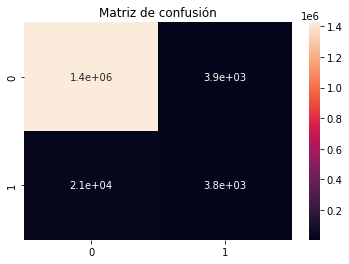

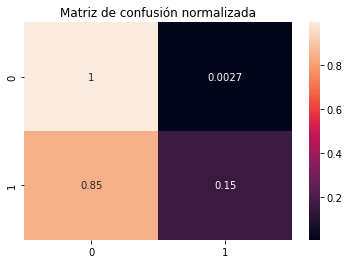

---------
 RandomForestClassifier() 1805.31 seconds of execution
Recall: 0.292 
Precision: 0.294 
ROC AUC: 0.849 
F1 score: 0.293 
Precision-Sensibilidad AUC: 0.245 
Accuracy: 0.976


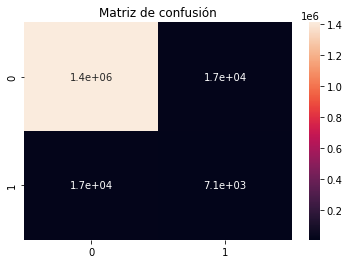

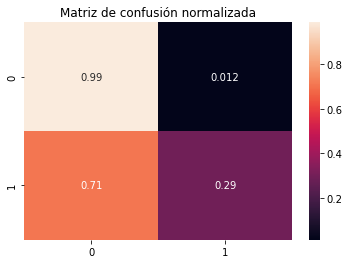

---------
 AdaBoostClassifier() 527.32 seconds of execution
Recall: 1.000 
Precision: 0.017 
ROC AUC: 0.824 
F1 score: 0.033 
Precision-Sensibilidad AUC: 0.110 
Accuracy: 0.017


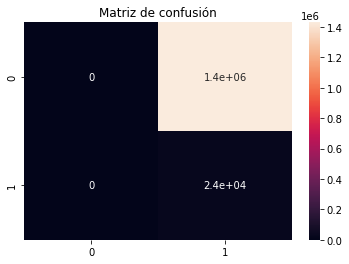

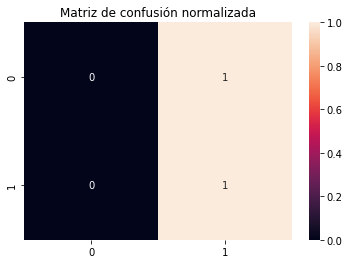

---------
 GradientBoostingClassifier() 1726.17 seconds of execution
Recall: 0.086 
Precision: 0.286 
ROC AUC: 0.832 
F1 score: 0.132 
Precision-Sensibilidad AUC: 0.134 
Accuracy: 0.981


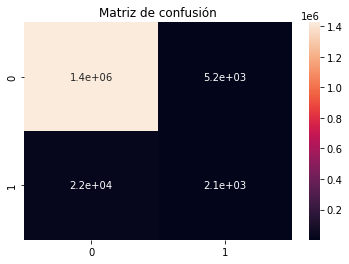

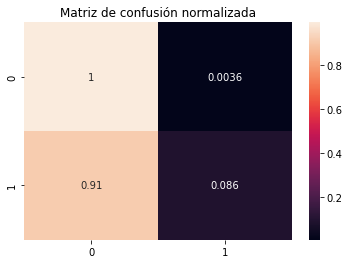

---------
 LGBMClassifier() 49.96 seconds of execution
Recall: 0.109 
Precision: 0.303 
ROC AUC: 0.847 
F1 score: 0.160 
Precision-Sensibilidad AUC: 0.147 
Accuracy: 0.981


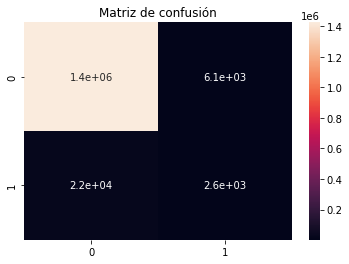

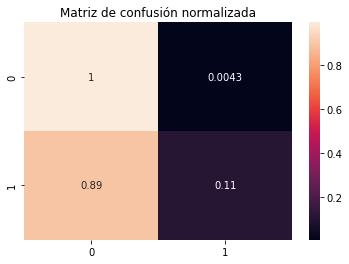

[13:39:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None) 485.02 seconds of execution
Recall: 0.161 
Precision: 0.245 


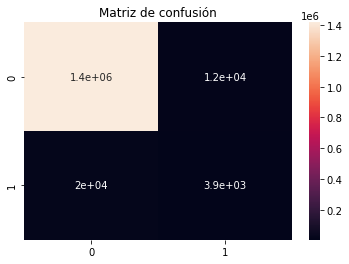

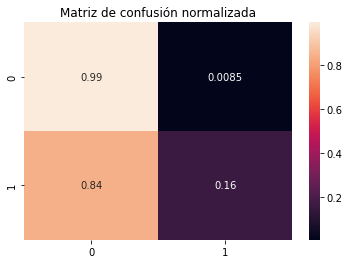

---------
 DummyClassifier(random_state=1997, strategy='stratified') 28.98 seconds of execution
Recall: 0.017 
Precision: 0.017 
ROC AUC: 0.500 
F1 score: 0.017 
Precision-Sensibilidad AUC: 0.025 
Accuracy: 0.967


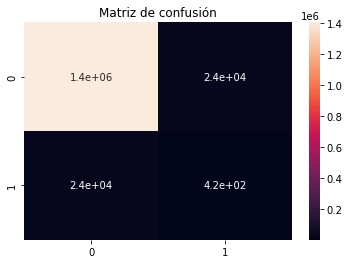

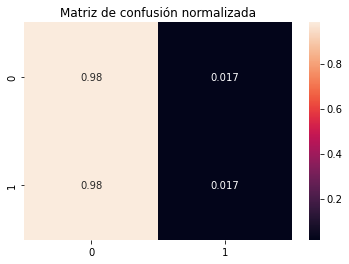

---------
 LogisticRegression(class_weight='balanced') 71.85 seconds of execution
Recall: 0.975 
Precision: 0.020 
ROC AUC: 0.808 
F1 score: 0.040 
Precision-Sensibilidad AUC: 0.110 
Accuracy: 0.217


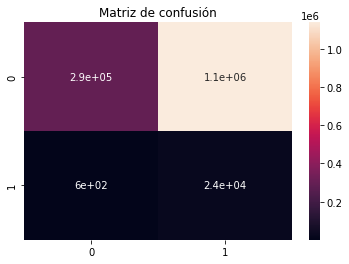

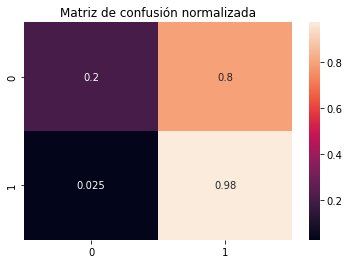

In [106]:
classifiers = [
    DecisionTreeClassifier(class_weight='balanced'), # Modelo adicional
    RandomForestClassifier(class_weight='balanced'),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier(), #LightGBM
    xgb.XGBClassifier(),
    DummyClassifier(strategy="stratified", random_state=1997), # Base Model
    LogisticRegression(class_weight='balanced'), # GLM
    # SVC(probability=True) Modelo adicional, arroja peores métricas que el Random Forest y, al ser un modelo secuencial, los tiempos de ejecución son mucho mayores
]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    
    start = time.time()
    
    pipe.fit(x_trainst, y_trainst)
    probs = pipe.predict_proba(x_testst)

    end = time.time()
    

    probs = probs[:, 1] # Probabilidad de la clase 1 (Accidente mortal)
    y_pred = (probs >= 0.2).astype(int) #tomamos un treshold de 0.2
    lr_precision, lr_recall, _ = precision_recall_curve(y_testst, probs)

    print('---------\n',classifier, "{:.2f}".format(end - start), "seconds of execution")
    print("Recall: %.3f" % recall_score(y_testst, y_pred), "\nPrecision: %.3f" % precision_score(y_testst, y_pred),
        "\nROC AUC: %.3f" % roc_auc_score(y_testst, probs), "\nF1 score: %.3f" % f1_score(y_testst, y_pred),
        "\nPrecision-Sensibilidad AUC: %.3f" % auc(lr_recall, lr_precision),
        "\nAccuracy: %.3f" % accuracy_score(y_testst, y_pred),)
    cf_matrix = confusion_matrix(y_testst, y_pred)
    sns.heatmap(cf_matrix, annot=True) # Matriz de confusión
    plt.title('Matriz de confusión')
    plt.show()
    cf_matrix = confusion_matrix(y_testst, y_pred, normalize='true')
    sns.heatmap(cf_matrix, annot=True) #  Matriz de confusión normalizada
    plt.title('Matriz de confusión normalizada')
    plt.show()

En el caso de los modelos de regresión calcularemos los errores MAPE, MAE y RMSE

In [105]:
regression_classifiers = [
    Lasso(),
    LinearRegression()
    ]

for classifier in regression_classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(x_trainst, y_trainst)
    y_pred = pipe.predict(x_testst)  
    print('---------\n',classifier)
    print("MAPE: %.3f" % mean_absolute_percentage_error(y_testst, y_pred), "\MAE: %.3f" % mean_absolute_error(y_testst, y_pred),
          "\RMSE: %.3f" % np.sqrt(mean_absolute_error(y_testst, y_pred)))

---------
 Lasso()
MAPE: 74162806350514.719 \MAE: 0.033 \RMSE: 0.181
---------
 LinearRegression()
MAPE: 81388002739564.078 \MAE: 0.034 \RMSE: 0.184


Analizando todas los modelos decidimos quedarnos con el RandomForest, ya que vemos que tiene el mayor área bajo la curva precisión-recall y, ademas acierta el 100% de los accidentes en los que no habrá ningún fallecido y el 35% de los que si, como vemos en la matriz de confusión, porcentajes que tienen una gran capacidad de mejorar posteriormente por medio de la selección de un threshold distinto.

En lo que respecta al modelo Lasso y el de regresión lineal, consideramos que no se ajustan bien a la naturaleza del problema que se plantea, la clasificación en categorías binarias.

In [12]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier())])

Realizamos un tunning de hiperparámetros  

In [13]:
# Parameter Tunning Optimization
param_grid = { 
    'classifier__n_estimators': [100, 125, 175, 200, 225, 250, 275],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4, 5, 6, 7, 8, None],
    'classifier__criterion' : ['gini', 'entropy']
    }

CV = RandomizedSearchCV(rf, param_grid, cv=10, random_state=12345, n_jobs=2)

model = CV.fit(x_trainst, y_trainst)
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__n_estimators': 125, 'classifier__max_features': 'log2', 'classifier__max_depth': None, 'classifier__criterion': 'gini'}
0.9838142528930696


Guardamos el modelo/objeto en un archivo binario por medio de la librería Pickle, para su posterior puesta en producción

In [14]:
ruta = '../models/modelo.pkl'
pickle.dump(CV, open(ruta, 'wb')) # Archivo abierto en modo escritura binaria


In [73]:
model= pickle.load(open("../models/modelo.pkl", "rb")) # Archivo abieto en modo lectura binaria

In [74]:
predict = model.predict(x_testst)

In [81]:
prob_predictions = model.predict_proba(x_testst)
probs = prob_predictions[:,1]
predictions = (probs >= 0.2).astype(int)

In [102]:
recall_score(y_testst, predict)

0.04001149047931714

In [103]:
precision_score(y_testst, predict)

0.9180790960451978

Sin tomar ningún treshold específico, pese a acertar en un 91% los accidentes que el modelo determinaba que serían mortales  obtenemos un recall de0.04 es decir unicamente detectamos un 4% de dichos accidentes mortales.

In [100]:
recall_score(y_testst, predictions)

0.2750328299409061

In [101]:
precision_score(y_testst, predictions)

0.32091553342271595

Tomando un treshold de 0.2 mejoran algo nuestras métricas,pues nuestro interes es tener un recall lo mejor posible y detectar el mayor número de accidentes mortales. Obtenemos un recall del 27% es decir el número de accidentes mortales que detecta el modelo y una precision del 32% es decir solo el 32% de los que predije que tenian accidente lo han tenido realmente.

**RECALL = Positivos Verdaderos / (Positivos Verdaderos + Falsos Negativos)**
<br>
**PRECISIÓN = Positivos Verdaderos / (Positivos Verdaderos + Falsos Positivos)**

Se puede establecer un umbral de decisión (treshold) óptimo en función de la curva ROC, que mejore las métricas consideradas para la evaluación del modelo y que mejore la capacidad de evitar falsos positivos y negativos

Best Threshold=0.040000, G-Mean=0.774


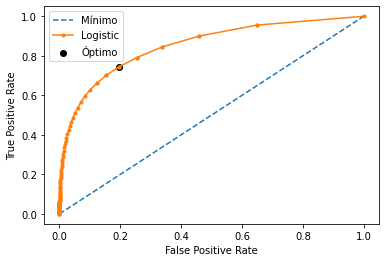

In [24]:
fpr, tpr, thresholds = roc_curve(y_testst, probs)

gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

plt.plot([0,1], [0,1], linestyle='--', label='Mínimo')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Óptimo')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [25]:
y_pred = (probs >= thresholds[ix]).astype(int)

In [26]:
lr_precision, lr_recall, _ = precision_recall_curve(y_testst, probs)

Recall: 0.744 
Precision: 0.061 
ROC AUC: 0.851 
F1 score: 0.113 
Precision-Sensibilidad AUC: 0.251 
Accuracy: 0.803


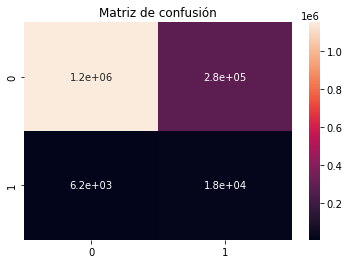

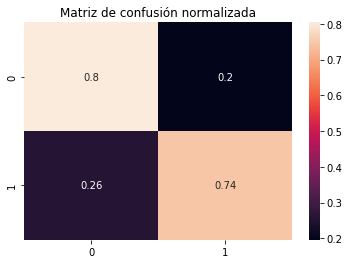

In [27]:
print("Recall: %.3f" % recall_score(y_testst, y_pred), "\nPrecision: %.3f" % precision_score(y_testst, y_pred),
    "\nROC AUC: %.3f" % roc_auc_score(y_testst, probs), "\nF1 score: %.3f" % f1_score(y_testst, y_pred),
    "\nPrecision-Sensibilidad AUC: %.3f" % auc(lr_recall, lr_precision),
    "\nAccuracy: %.3f" % accuracy_score(y_testst, y_pred),)
cf_matrix = confusion_matrix(y_testst, y_pred)
sns.heatmap(cf_matrix, annot=True) # Matriz de confusión
plt.title('Matriz de confusión')
plt.show()
cf_matrix = confusion_matrix(y_testst, y_pred, normalize='true')
sns.heatmap(cf_matrix, annot=True) #  Matriz de confusión normalizada
plt.title('Matriz de confusión normalizada')
plt.show()

Observamos que realizando estas modificaciones hemos mejorado significativamente la predición de accidentes mortales, obteniendo un Recall de 0.74.

Best Threshold=0.176000, F-Score=0.297


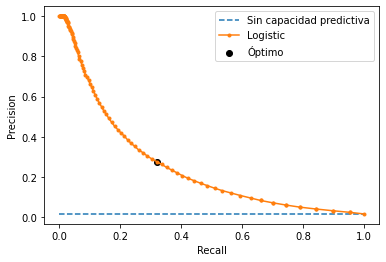

In [28]:
precision, recall, thresholds2 = precision_recall_curve(y_testst, probs)

fscore = (2 * precision * recall) / (precision + recall)

ix2 = np.argmax(fscore)
predictions=(probs >= thresholds2[ix2]).astype(int)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds2[ix2], fscore[ix2]))

no_skill = len(y_testst[y_testst==1]) / len(y_testst)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Sin capacidad predictiva')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix2], precision[ix2], marker='o', color='black', label='Óptimo')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()

In [29]:
y_pred2 = (probs >= thresholds2[ix2]).astype(int)

Recall: 0.320 
Precision: 0.277 
ROC AUC: 0.851 
F1 score: 0.297 
Precision-Sensibilidad AUC: 0.251 
Accuracy: 0.975


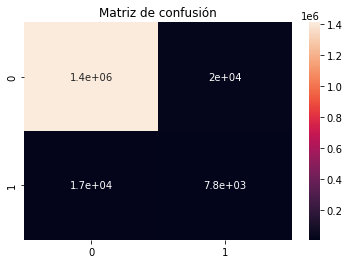

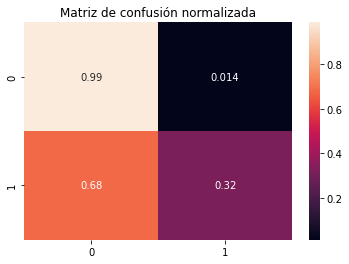

In [31]:
print("Recall: %.3f" % recall_score(y_testst, y_pred2), "\nPrecision: %.3f" % precision_score(y_testst, y_pred2),
    "\nROC AUC: %.3f" % roc_auc_score(y_testst, probs), "\nF1 score: %.3f" % f1_score(y_testst, y_pred2),
    "\nPrecision-Sensibilidad AUC: %.3f" % auc(recall, precision),
    "\nAccuracy: %.3f" % accuracy_score(y_testst, y_pred2),)
cf_matrix = confusion_matrix(y_testst, y_pred2)
sns.heatmap(cf_matrix, annot=True) # Matriz de confusión
plt.title('Matriz de confusión')
plt.show()
cf_matrix = confusion_matrix(y_testst, y_pred2, normalize='true')
sns.heatmap(cf_matrix, annot=True) #  Matriz de confusión normalizada
plt.title('Matriz de confusión normalizada')
plt.show()

Aunque a priori, para este tipo de problemas de clasificación binaria con un fuerte desbalanceo entre clases, es más conveniente tener en cuenta el área de la curva precisión-sensitividad y el cálculo un umbral de decisión óptimo por encima del que pueda arrojar la curva ROC, tras probar ambos thresholds por medio de estos métodos, el obtenido a partir de la curva ROC muestra un mejor desempeño

Complementariamente, añadimos otras métricas para evaluar el desempeño del modelo

La F1-score se trata de una métrica compuesta de Precision y Recall, utulizada para evaluar de un modo más global y equilibrado el desempeño del modelo:
<br>
<br>
**F1 = 2(precision+recall)/(precision*recall)**

In [32]:
score = f1_score(y_testst, y_pred)
print('F-Score: %.5f' % score)

F-Score: 0.11253


La **Curva de Ganancia Acumulada** es una curva de evaluación que mide el desempeño del modelo y compara sus resultados con una elección aleatoria de los mismos. Muestra el porcentaje de aciertos acorde a un porcentaje concreto de la muestra.

En la *Curva de Ganancia Acumulada*, el eje X indica el porcentaje de observaciones/población se está considerando, situando más a la derecha aquellas observaciones con una mayor probabilidad de pertenecer a la clase objetivo del modelo y que desciende a medida que crece el porcentaje
<br>
Por otro lado, eje Y indica la cantidad acumulada de todas las observaciones potenciales que son la clase de interés como porcentaje de las observaciones que se están considerando actualmente.
<br>
<br>
Estos medidores/benchmarks del modelo se comparan con una elección aleatoria de categorías, que se considera como el modelo base, representado por medio de la línea negra discontinua.

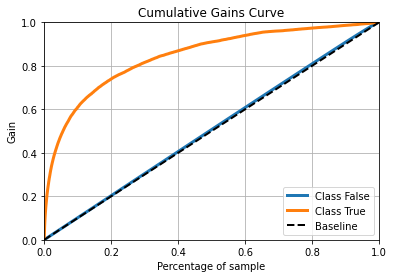

In [35]:
skplt.metrics.plot_cumulative_gain(y_testst, prob_predictions)
plt.show()

En nuestro caso concreto, dentro del 20% de los accidentes con mayor probabilidad de fallecidos, se situan entorno al 75% de los fallecidos reales. Debido al ordenamiento del eje X descrito anteriormente, la curva de ganancia cada vez experimenta una pendiente menor, puesto que las observaciones consideradas más a la izquierda son las que probabilisticamente contienen un menor número de fallecidos.

La **Curva Lift** muestra cuantas veces es mejor el modelo con respecto a una selección aleatoria de categorías, ordenando de mayor  a menor el porcentaje de la muestra/población con mejores resultados para el modelo predictivo. De esa ordenación se deriva la forma descendiente de la curva y que esta tenga una asíntota horizontal en 1, donde el modelo muestra un porcentaje de acierto idéntico a la elección aleatoria y con una ganancia frente a esta nula por parte del Random Forest, en este caso. El valor lift, presente en el eje Y, mide cuantas veces es mejor el resultado que arroja el modelo frente a la clasificación aleatorizada.

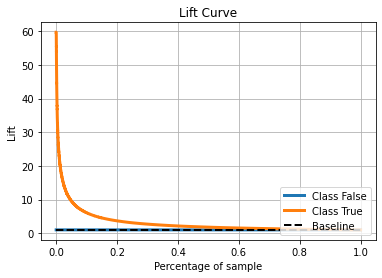

In [36]:
skplt.metrics.plot_lift_curve(y_testst, prob_predictions)
plt.show()

Tratamos de realizar los partial dependence display para ver el efecto de nuestras variables numericas en las predicciones del modelo, resulto imposible ejecutarlo por el tiempo que suponia.

In [37]:
preprocessor = model.best_estimator_.named_steps["preprocessor"]

In [38]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['C_WTHR', 'C_RALN', 'P_SEX', 'P_SAFE',
                                  'P_USER']),
                                ('catboost', CatBoostEncoder(),
                                 ['C_VEHS', 'P_AGE', 'V_ANTIG']),
                                ('target', TargetEncoder(),
                                 ['P_PSN', 'C_CONF', 'C_TRAF', 'V_TYPE',
                                  'C_RCFG', 'C_RSUR'])])

Obtenemos los nombres que se otorgan a las variables tras realizar el One_hot encoding

In [39]:
c_oh=list(preprocessor.named_transformers_["onehot"].get_feature_names(One_hot))

Nos creamos datasets tanto de test como de train con los datos despues de realizar los encoding correspondientes

In [57]:
test_data=pd.DataFrame(preprocessor.transform(x_testst))

In [54]:
train_data = pd.DataFrame(preprocessor.transform(x_trainst))

In [55]:
colnames=numericas+c_oh+Cat_boost+Resto_cat

In [58]:
test_data.columns = colnames

In [59]:
train_data.columns = colnames

In [60]:
test_data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_WTHR_1,C_WTHR_2,C_WTHR_3,C_WTHR_4,C_WTHR_5,C_WTHR_6,C_WTHR_7,C_WTHR_Q,C_WTHR_U,C_RALN_1,C_RALN_2,C_RALN_3,C_RALN_4,C_RALN_5,C_RALN_6,C_RALN_Q,C_RALN_U,P_SEX_F,P_SEX_M,P_SEX_N,P_SEX_U,P_SAFE_01,P_SAFE_02,P_SAFE_09,P_SAFE_10,P_SAFE_11,P_SAFE_12,P_SAFE_13,P_SAFE_NN,P_SAFE_QQ,P_SAFE_UU,P_USER_1,P_USER_2,P_USER_3,P_USER_4,P_USER_5,P_USER_U,C_VEHS,P_AGE,V_ANTIG,P_PSN,C_CONF,C_TRAF,V_TYPE,C_RCFG,C_RSUR
0,-1.310755,0.083479,-0.005334,0.439893,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.013438,0.018028,0.016236,0.014594,0.006336,0.013600,0.014246,0.009746,0.016824
1,-1.310755,0.374739,1.029423,1.019502,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.012539,0.009174,0.015833,0.014594,0.006336,0.005296,0.011722,0.009746,0.016824
2,0.441411,1.248516,1.029423,0.826299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.012615,0.019138,0.015074,0.018288,0.003563,0.023956,0.014246,0.027502,0.016824
3,-0.653693,-0.499039,-0.005334,0.246690,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.014026,0.016126,0.016419,0.014594,0.003563,0.023956,0.014246,0.009746,0.016824
4,0.222390,-0.790298,0.512044,-0.332919,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.012539,0.017357,0.016452,0.014594,0.013812,0.013600,0.024092,0.009746,0.016824


Comprobamos visualmente que se haya realizado bien el encoding comparando con el dataset de test original ya que el One_hot encoding es muy facil de comprobar visualmente.

In [61]:
df_test_strat.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,P_SEX,P_AGE,P_PSN,P_SAFE,P_USER,V_ANTIG,C_SEV
626691,2000,7.0,4.0,16.0,2.0,36,02,1,1,1,03,01,M,19,11,02,1,24,False
678806,2000,8.0,6.0,19.0,2.0,36,02,1,1,1,01,UU,U,UU,11,UU,U,UUUU,False
3896186,2008,11.0,6.0,18.0,3.0,21,01,1,1,1,18,01,F,62,13,02,2,7,False
1806822,2003,5.0,4.0,15.0,3.0,21,02,1,1,4,18,01,M,42,11,02,1,11,False
3331342,2007,4.0,5.0,12.0,2.0,35,02,2,1,1,03,06,M,54,11,02,1,13,False


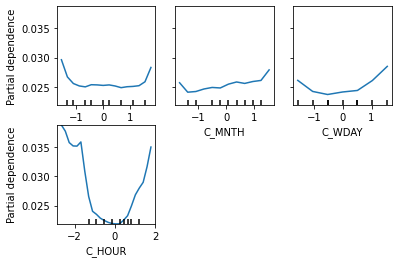

In [104]:
features = [0, 1, 2, 3]
PartialDependenceDisplay.from_estimator(model.best_estimator_.named_steps['classifier'], train_data, features)

**Dependencia parcial** de las variables tratadas como estríctamente numéricas, en este caso relacionadas con el tiempo, C_YEAR, C_MNTH, C_WDAY, C_HOUR

# INTERPRETABILIDAD

En lo que respecta a la interpretabilidad global, obtenemos la importancia que otorga el propio Random Forest a cada variable.


In [46]:
model.best_estimator_.named_steps['classifier'].feature_importances_

array([8.25087161e-02, 7.14347045e-02, 5.68803242e-02, 8.80704661e-02,
       8.96909275e-03, 6.95967402e-03, 5.08299484e-03, 3.78130383e-03,
       1.38257022e-03, 3.16984547e-03, 1.26156839e-03, 6.83015497e-04,
       1.17827114e-03, 6.05299617e-03, 5.45811726e-03, 4.48066604e-03,
       3.95427168e-03, 1.76462278e-03, 1.51041004e-03, 5.42925527e-04,
       2.26076795e-03, 3.84228880e-03, 4.17836226e-03, 1.52770904e-04,
       1.10035712e-03, 8.68362953e-03, 4.66185297e-03, 9.14524473e-04,
       8.30095327e-06, 4.88163305e-08, 9.27330638e-04, 1.86868985e-03,
       2.96718489e-03, 1.35728548e-03, 4.08404217e-03, 3.13121327e-03,
       3.31065717e-03, 6.33222984e-04, 5.90042297e-04, 8.09757180e-04,
       1.90077939e-03, 1.44253991e-01, 1.40478601e-01, 1.37147041e-01,
       1.88033110e-02, 6.72859460e-02, 1.89011436e-02, 2.03693000e-02,
       2.25882170e-02, 2.76627838e-02])

Realizamos este gráfico para mostrar las variables en orden de importancia.
<br>
<br>
En primer lugar tenemos la variable 'C_VEHS' que indica el número de vehiculos involucrados en el accidente, que supone la caracteristica más relevante a la hora de segregar dentro del modelo.
En segundo lugar tenemos 'P_AGE', que mide la edad del conductor , seguido de 'V_ANTIG' que corresponde a la antiguedad del vehículo y de 'C_HOUR' que corresponde a la hora de colisión. 
<br>
<br>
Esta importancia que otorga el modelo a estas variables sigue en cierta medida el sentido común, puesto el número de vehiculos es determinante para saber si un accidente es mortal o no, también los patrones de conducción a diferentes edades varian enormemente, así como sus capacidades como conductores. En lo que respecta a la antiguedad del vehículo, se trata de una característica clave a la hora de determinar los sistemas de seguridad de los que dispone. Finalmente, la hora del día condiciona enormemente las condiciones de tráfico, visibilidad y estado del conductor.



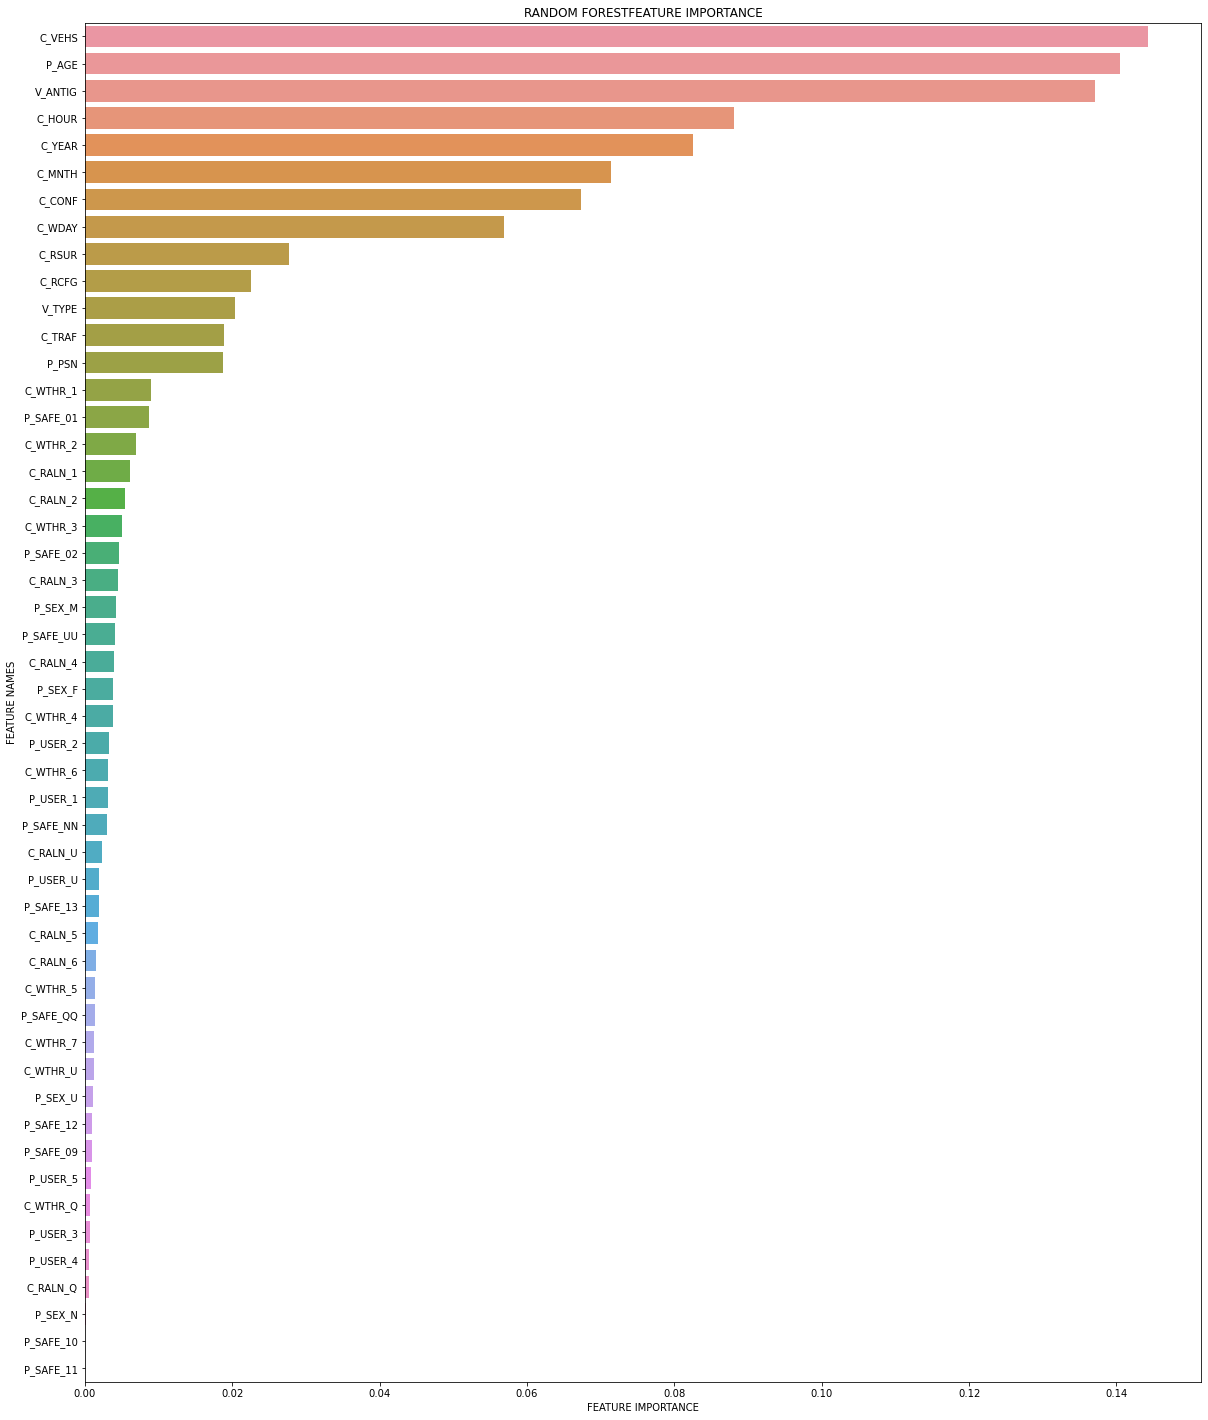

In [62]:
f.plot_feature_importance(model.best_estimator_.named_steps['classifier'].feature_importances_, test_data.columns, 'RANDOM FOREST')


Para la interpretabilidad local utilizaremos el método SHAP. El método Shap es un metodo para explicar las predicciones individuales, se basa en los valores de Shapley.
<br>


In [48]:
shap.initjs()

In [49]:
explainer = shap.TreeExplainer(model.best_estimator_.named_steps['classifier'])


In [63]:
shap_values=explainer.shap_values(test_data.iloc[0:100,:])

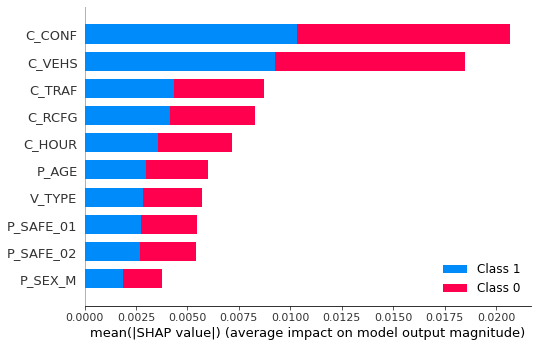

In [64]:
shap.summary_plot(shap_values, features=test_data.iloc[0:100,:], max_display=10)

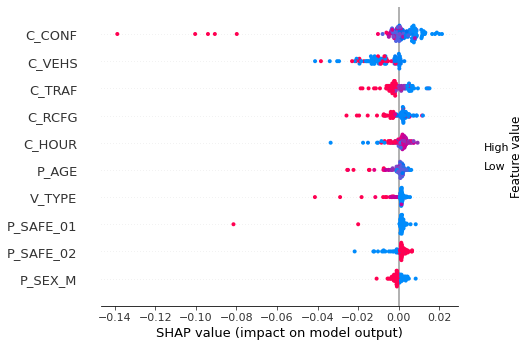

In [65]:
shap.summary_plot(shap_values[0], features=test_data.iloc[0:100,:], max_display=10)

Este summary nos muestra un grafica donde el eje de las x corresponde al valor del SHAP, y el eje de las y corresponde a las variables ordenadas por importancia.
<br>
En este caso, tomamos las 10 más importantes, y en función de los colores rojo (high) y azul (low) sabemos el efecto que de dicha variable sobre el valor SHAP.
<br>
El valor del SHAP esta correlacionado con el score de nuestro modelo predictivo de la siguiente forma: valores de SHAP bajos contribuyen hacia un score de cero y valores de SHAP alto hacía un score más cercano uno.
<br>
<br>
Si un mismo color esta presente a ambos lados (partiendo del valor SHAP = 0), esto supone que esos valores (sean altos o bajos) contribuyen de la misma forma tanto a que el score sea cero como uno, lo que nos informa de la neutralidad de la variable en este sentido. Este ejemplo se ve claramente en el caso de la variable C_HOUR.
<br>
<br>
Entrando más en detalle en nuestro dataset, se ve muy claro en la variable C_CONF pese pese a estar los colores algo entremezclados se observa que valores bajos de esta variable intervienen positivamente hacia un valor del SHAP alto, es decir, a que el score sea uno.
<br>
En el caso de las variables codificadas P_SAFE_02, que corresponde a el uso de dispositivos de seguridad, y P_SAFE_01 observamos una clara división entre aquellos valores que aportan positiva y negativamente al score del modelo, y que son inversamente proporcionales.

In [66]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], test_data.iloc[0,:])

En el gráfico anterior se detalla esta influencia anteriormente descrita de las variables sobre los valores SHAP y el score del modelo a nivel de fila, tomando únicamente en este caso el primer registro. 

In [67]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:100,:], features=test_data.iloc[:100, :])

En este gráfico obtenemos una representación equivalente a la anterior pero a nivel agregado de los cien primeros registros, que ha sido el total utilizado para calcular los valores SHAP.